In [8]:
import os
import h5py
import json
import pandas as pd

import torch
import numpy as np
from torchvision.io import ImageReadMode, decode_image

import matplotlib.pyplot as plt

In [2]:
root = "/home/jluesch/Documents/data/plankton/hdf5/"

In [3]:
files = os.listdir(root)

In [4]:
acc_ids = []
acc_names = []

hdf5_handles = dict()
all_files_entries = dict()
class_names_dict = dict()
for hdf5_file in files:
    print(hdf5_file, end=" ")
    all_files_entries[hdf5_file] = []
    class_ids = []
    class_names = []
    hdf5_file_path = os.path.join(root, hdf5_file)
    file = h5py.File(hdf5_file_path, "r")
    hdf5_handles[hdf5_file] = file

    # Read the JSON string from the 'file_index' dataset
    file_index_json = file["file_index"][()]
    file_index = json.loads(file_index_json)

    # Add the HDF5 file name to each entry and accumulate the file entries
    for entry in file_index["files"]:
        entry["hdf5_file"] = hdf5_file_path  # Add the HDF5 file name to the entry
        all_files_entries[hdf5_file].append(entry)
        class_id = entry["class_id"]
        class_str = entry["class_str"]
        if class_id not in class_ids:
            class_ids.append(class_id)
            class_names.append(class_str)

        if class_id not in acc_ids:
            acc_ids.append(class_id)
            acc_names.append(class_str)
    class_names_dict[hdf5_file] = class_names

    print(len(class_ids))

2011-TRAIN.hdf5 94
2007-TRAIN.hdf5 88
2013-VAL.hdf5 93
2009-VAL.hdf5 94
2008-VAL.hdf5 92
2014-TRAIN.hdf5 94
2012-VAL.hdf5 95
2010-TRAIN.hdf5 97


In [12]:
class_names_dict.keys()

dict_keys(['2011-TRAIN.hdf5', '2007-TRAIN.hdf5', '2013-VAL.hdf5', '2009-VAL.hdf5', '2008-VAL.hdf5', '2014-TRAIN.hdf5', '2012-VAL.hdf5', '2010-TRAIN.hdf5'])

In [13]:
all_names = set()
for v in class_names_dict.values():
    all_names = all_names.union(set(v))

In [14]:
print(len(all_names))

102


In [15]:
for k, v in class_names_dict.items():
    print(k, " missing :", all_names.difference(set(v)))

2011-TRAIN.hdf5  missing : {'bead', 'Chaetoceros_didymus_flagellate', 'Akashiwo', 'Tiarina_fusus', 'Gonyaulax', 'Tontonia_appendiculariformis', 'bubble', 'pollen'}
2007-TRAIN.hdf5  missing : {'Euplotes_sp', 'Hemiaulus', 'bead', 'Chaetoceros_didymus_flagellate', 'Bacillaria', 'Cochlodinium', 'pennate_morphotype1', 'Emiliania_huxleyi', 'Akashiwo', 'Cerataulina_flagellate', 'Gonyaulax', 'Tontonia_appendiculariformis', 'bubble', 'dino_large1'}
2013-VAL.hdf5  missing : {'kiteflagellates', 'Hemiaulus', 'Leptocylindrus_mediterraneus', 'Bidulphia', 'Didinium_sp', 'Akashiwo', 'Tiarina_fusus', 'Gonyaulax', 'bubble'}
2009-VAL.hdf5  missing : {'kiteflagellates', 'Hemiaulus', 'Leptocylindrus_mediterraneus', 'Chaetoceros_didymus_flagellate', 'Bacillaria', 'Emiliania_huxleyi', 'Akashiwo', 'bubble'}
2008-VAL.hdf5  missing : {'kiteflagellates', 'Leptocylindrus_mediterraneus', 'bead', 'Bacillaria', 'Cochlodinium', 'Emiliania_huxleyi', 'Didinium_sp', 'Akashiwo', 'Pseudochattonella_farcimen', 'dino_large1

In [46]:
all_files_entries

{'2011-TRAIN.hdf5': [{'index': 0,
   'path': '2011_amoeba_IFCB1_2011_255_210152_00669.png',
   'class_str': 'amoeba',
   'class_id': 0,
   'hdf5_file': '/home/jluesch/Documents/data/plankton/hdf5/2011-TRAIN.hdf5'},
  {'index': 1,
   'path': '2011_amoeba_IFCB1_2011_284_210748_00147.png',
   'class_str': 'amoeba',
   'class_id': 0,
   'hdf5_file': '/home/jluesch/Documents/data/plankton/hdf5/2011-TRAIN.hdf5'},
  {'index': 2,
   'path': '2011_amoeba_IFCB1_2011_284_212925_02994.png',
   'class_str': 'amoeba',
   'class_id': 0,
   'hdf5_file': '/home/jluesch/Documents/data/plankton/hdf5/2011-TRAIN.hdf5'},
  {'index': 3,
   'path': '2011_amoeba_IFCB1_2011_284_215233_00989.png',
   'class_str': 'amoeba',
   'class_id': 0,
   'hdf5_file': '/home/jluesch/Documents/data/plankton/hdf5/2011-TRAIN.hdf5'},
  {'index': 4,
   'path': '2011_amoeba_IFCB5_2011_039_034322_00396.png',
   'class_str': 'amoeba',
   'class_id': 0,
   'hdf5_file': '/home/jluesch/Documents/data/plankton/hdf5/2011-TRAIN.hdf5'},
 

In [47]:
class_ids_all = [
    el_dict["class_id"]
    for file_data in all_files_entries.values()
    for el_dict in file_data
]

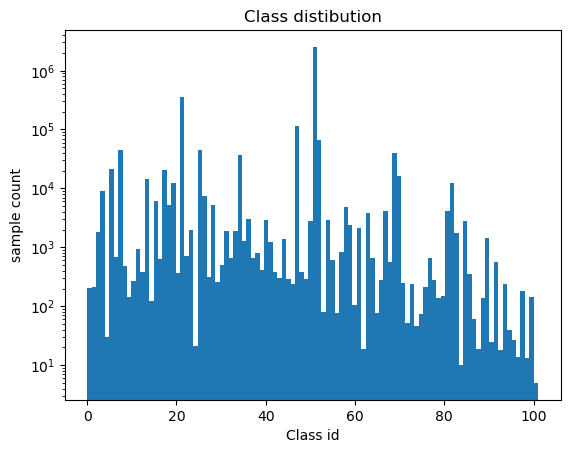

In [55]:

f, a = plt.subplots(1,1)
plt.hist(class_ids_all, bins=102)
a.set_yscale('log')
plt.title('Class distibution')
plt.xlabel('Class id')
plt.ylabel('sample count')
plt.savefig('./class_distibution.png', dpi=200, bbox_inches='tight')
plt.show()

In [50]:
unique, counts = np.unique(class_ids_all, return_counts=True)
sorted_counts = sorted(counts, reverse=True)
print(np.sum(sorted_counts[:5]/ np.sum(counts)))

0.906802151753229


In [37]:
hdf5_file_name = list(all_files_entries.keys())[0]

all_files_entries[hdf5_file_name][0]['path']

'2011_amoeba_IFCB1_2011_255_210152_00669.png'

In [38]:
hdf5_file_name = list(all_files_entries.keys())[0]

img_bytes = hdf5_handles[hdf5_file_name][all_files_entries[hdf5_file_name][0]["path"]][
    ()
]

image = torch.frombuffer(np.copy(img_bytes), dtype=torch.uint8)
image = decode_image(image, ImageReadMode.RGB)
image = (image / 255.0).to(torch.float32)

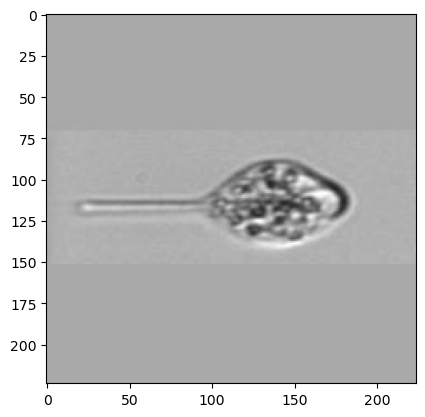

In [39]:
c, h, w = image.size()
plt.imshow(image.permute(1, 2, 0))
plt.show()

tensor(13521.3076)


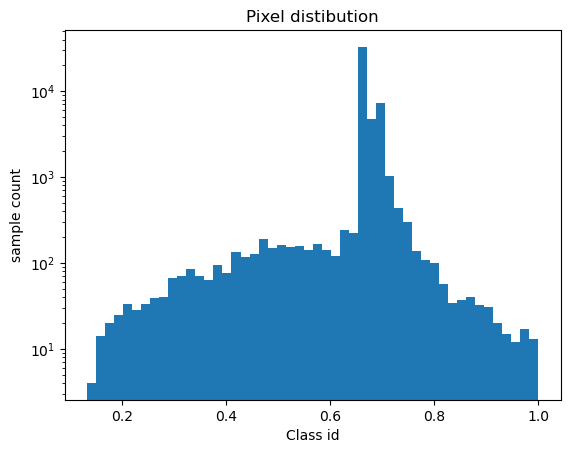

In [54]:
flatened_img = image[0, :, :].flatten()
entropy1 = torch.sum(-flatened_img * torch.log(flatened_img))
print(entropy1)


f, a = plt.subplots(1, 1)
plt.hist(flatened_img, bins=50)
a.set_yscale("log")
plt.title("Pixel distibution")
plt.xlabel("Class id")
plt.ylabel("sample count")
plt.savefig("./pixel_distibution.png", dpi=200, bbox_inches="tight")
plt.show()

In [52]:
unique, counts = np.unique(flatened_img, return_counts=True)
sorted_pix_counts = sorted(counts, reverse=True)
print(np.sum(sorted_pix_counts[:5] / np.sum(sorted_pix_counts)))

0.7859933035714286


In [33]:
import sys

sys.path.insert(0, "..")

from dinov2.data.augmentations import DataAugmentationDINO
from dinov2.data.loaders import make_dataset

ds_path = f"HDF5Dataset:split=TRAIN:root={root}:extra=*"

data_transform_cpu = DataAugmentationDINO(
    [0.32, 0.8],
    [0.05, 0.32],
    8,
    global_crops_size=224,
    local_crops_size=96,
    do_transform_on_gpu=False,
)

dataset = make_dataset(
    dataset_str=ds_path,
    transform=data_transform_cpu,
    target_transform=lambda _: (),
    with_targets=False,
    cache_dataset=False,
)

/home/jluesch/micromamba/envs/dinov2/lib/python3.9/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


Dataset kwargs {'split': <_Split.TRAIN: 'train'>, 'root': '/home/jluesch/Documents/data/plankton/hdf5/', 'extra': '*', 'do_short_run': False}
root: /home/jluesch/Documents/data/plankton/hdf5/, extra_root: *, extra_path: -TRAIN.hdf5
Datasets file list:  ['/home/jluesch/Documents/data/plankton/hdf5/2011-TRAIN.hdf5', '/home/jluesch/Documents/data/plankton/hdf5/2007-TRAIN.hdf5', '/home/jluesch/Documents/data/plankton/hdf5/2014-TRAIN.hdf5', '/home/jluesch/Documents/data/plankton/hdf5/2010-TRAIN.hdf5']
#unique_class_ids: _Split.TRAIN, 102
#unique_class_names: ['Akashiwo' 'Amphidinium_sp' 'Asterionellopsis' 'Bacillaria' 'Bidulphia'
 'Cerataulina' 'Cerataulina_flagellate' 'Ceratium'], 102


dict_keys(['global_crops', 'global_crops_teacher', 'local_crops', 'offsets'])
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)


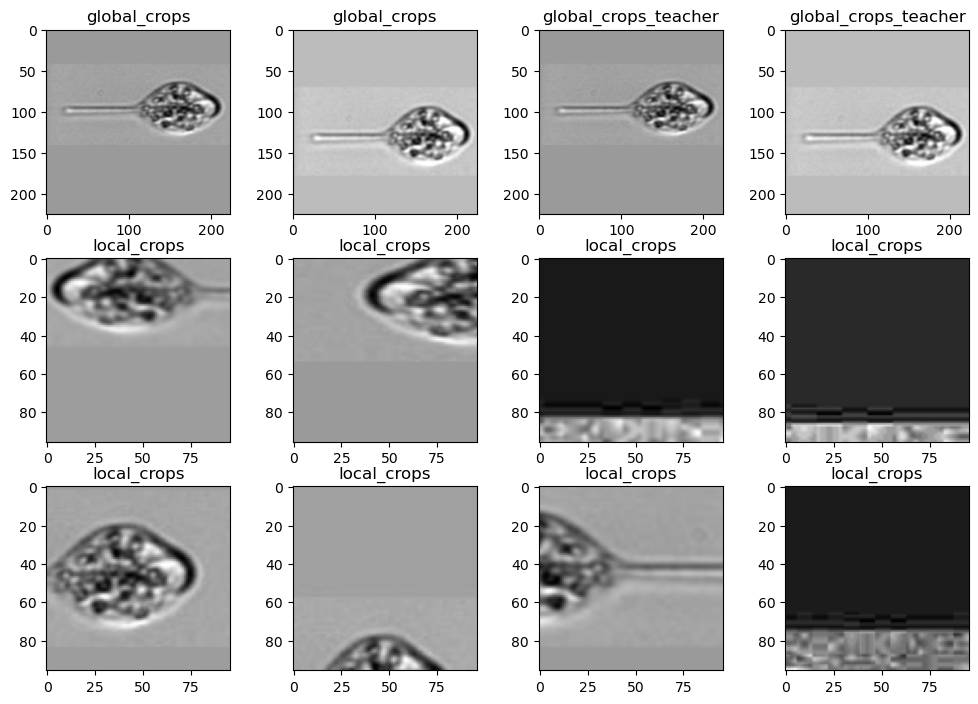

In [56]:
imgs = dataset[0][0]
print(imgs.keys())

f, a = plt.subplots(3, 4)
f.set_size_inches(10,7)
f.tight_layout()
count = 0
for k in imgs.keys():
    for img in imgs[k]:
        norm_img = (img - torch.min(img)) / (torch.max(img) - torch.min(img))
        print(torch.max(norm_img), torch.min(norm_img))
        a[count // 4,count % 4].imshow(norm_img.permute(1, 2, 0))
        a[count // 4, count % 4].set_title(k)
        count += 1